Introdução: Explorando Tendências no Mercado Automotivo

O mercado automotivo é um setor dinâmico e em constante evolução, onde as preferências dos consumidores, as inovações tecnológicas e os padrões econômicos desempenham papéis cruciais na determinação das tendências de venda e no sucesso das empresas. Com um vasto conjunto de dados à nossa disposição, propomos uma análise abrangente para desvendar os padrões subjacentes e as dinâmicas do mercado de carros.

Nossa análise visa oferecer uma visão panorâmica, abordando uma variedade de aspectos, desde o perfil demográfico dos compradores até a influência de diferentes atributos do veículo no comportamento do consumidor. Ao mergulhar nas camadas de dados disponíveis, buscamos identificar correlações significativas, tendências emergentes e insights valiosos que possam informar estratégias de negócios e tomadas de decisão fundamentadas.

Ao compreender as nuances do mercado automotivo, esperamos fornecer informações cruciais não apenas para fabricantes e revendedores de automóveis, mas também para consumidores que buscam tomar decisões informadas de compra. Nossa análise pretende ser uma ferramenta poderosa para orientar estratégias de marketing, desenvolvimento de produtos e expansão de mercado, capacitando as empresas a se adaptarem às demandas em constante mudança do setor automotivo.

Nesta jornada de exploração de dados, estamos ansiosos para desvendar os segredos por trás das tendências do mercado automotivo e oferecer insights valiosos que possam impulsionar o sucesso e a inovação neste setor crucial da economia global.






**1. Análise de Vendas por Região do Revendedor:** Você pode agrupar os dados pelo "Dealer_Region" e analisar as vendas totais ou médias em cada região.

**2. Segmentação de Clientes por Gênero e Renda Anual:** Explore a distribuição de gênero entre os clientes e como ela se relaciona com a renda anual. Isso pode ajudar a identificar padrões de compra entre diferentes grupos demográficos.

**3. Preço Médio por Modelo de Carro:** Analise o preço médio de venda para cada modelo de carro. Isso pode ajudar a identificar quais modelos têm maior demanda ou valor de mercado.

**4. Distribuição de Cores de Carros Vendidos:** Determine as cores mais populares entre os carros vendidos. Isso pode ser útil para entender as preferências dos clientes em termos de estética.

**5. Análise Temporal de Vendas:** Explore padrões sazonais ou tendências ao longo do tempo analisando as vendas em relação à data.

**6. Desempenho de Revendedores:** Compare o desempenho de diferentes revendedores em termos de número de vendas, receita gerada ou satisfação do cliente.

**7. Análise de Correlação:** Explore se existe alguma correlação entre variáveis, como preço do carro e renda anual do cliente.

**8. Distribuição de Estilos de Carro Vendidos:** Analise a distribuição dos estilos de carro vendidos (por exemplo, sedan, SUV, hatchback) para entender as preferências do mercado.

**9. Análise de Engenharia e Transmissão por Modelo:** Veja se há alguma preferência específica de engenharia (por exemplo, motor de 4 cilindros, 6 cilindros) ou tipo de transmissão (automático, manual) para cada modelo de carro.

**10. Análise de Satisfação do Cliente:** Explore a relação entre o nome do cliente, o revendedor e possivelmente outras variáveis para entender os níveis de satisfação do cliente e identificar áreas para melhoria.

**11. Análise de Distribuição de Idade dos Clientes:** Se houver informações sobre a idade dos clientes, você pode analisar a distribuição etária dos compradores de carros.

**12. Variação de Preço por Cor e Estilo do Carro:** Analise se há variação de preço com base na cor ou estilo do carro. Isso pode ajudar a determinar se certas características têm impacto no valor de mercado.

**13. Análise de Demanda por Região e Estilo do Carro:** Explore se a demanda por diferentes estilos de carro varia entre as regiões dos revendedores.

**14. Análise de Desempenho do Modelo de Carro ao Longo do Tempo:** Analise como o desempenho de vendas de um determinado modelo de carro evolui ao longo do tempo desde o seu lançamento.

**15. Análise de Engajamento do Cliente com o Revendedor:** Explore a frequência de compra ou interação dos clientes com os revendedores ao longo do tempo.

**16. Análise de Sazonalidade nas Vendas de Carros:** Identifique padrões sazonais nas vendas de carros, como picos de vendas durante determinadas épocas do ano.

**17. Análise de Lucratividade por Modelo de Carro e Revendedor:** Determine quais modelos de carro e revendedores são mais lucrativos com base nas margens de lucro.

**18. Análise de Preferências de Transmissão por Gênero:** Explore se há diferenças nas preferências de transmissão entre clientes de diferentes gêneros.

**19. Análise de Lealdade do Cliente:** Analise se os clientes tendem a comprar repetidamente da mesma marca ou revendedor ao longo do tempo.

**20. Análise de Correlação entre Características do Carro e Preço:** Investigação de possíveis correlações entre características específicas do carro, como tamanho do motor, tipo de transmissão ou cor, e o preço de venda.

In [2]:
# importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
# Leitura do dataset
dados = pd.read_csv('Car Sales.csv')

In [5]:
# Visualização dos dados
dados

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [7]:
dados.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [65]:
dados = dados.drop(columns = ['Car_id', 'Customer Name', 'Dealer_No ', 'Phone'], axis = 1)
dados.head()

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [25]:
dados.columns

Index(['Date', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model',
       'Engine', 'Transmission', 'Color', 'Price ($)', 'Body Style',
       'Dealer_Region'],
      dtype='object')

In [26]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           23906 non-null  datetime64[ns]
 1   Gender         23906 non-null  object        
 2   Annual Income  23906 non-null  int64         
 3   Dealer_Name    23906 non-null  object        
 4   Company        23906 non-null  object        
 5   Model          23906 non-null  object        
 6   Engine         23906 non-null  object        
 7   Transmission   23906 non-null  object        
 8   Color          23906 non-null  object        
 9   Price ($)      23906 non-null  int64         
 10  Body Style     23906 non-null  object        
 11  Dealer_Region  23906 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 2.2+ MB


**1. Análise de Vendas por Região do Revendedor:** Você pode agrupar os dados pelo "Dealer_Region" e analisar as vendas totais ou médias em cada região.

In [27]:
dados.groupby('Dealer_Region')['Price ($)'].agg(['sum', 'mean'])

,sum,mean
Dealer_Region,,
Aurora,88687382,28334.626837
Austin,117192531,28341.603628
Greenville,88149602,28180.819054
Janesville,106351234,27833.350955
Middletown,87134628,27856.338875
Pasco,88040714,28119.039923
Scottsdale,95969374,27954.958928


**2. Segmentação de Clientes por Gênero e Renda Anual:** Explore a distribuição de gênero entre os clientes e como ela se relaciona com a renda anual. Isso pode ajudar a identificar padrões de compra entre diferentes grupos demográficos.

In [28]:
dados.groupby('Gender')[['Annual Income']].agg(['count', 'mean'])

Annual Income               
               count           mean
Gender                             
Female          5108  755973.021339
Male           18798  851184.044207

**3. Preço Médio por Modelo de Carro:** Analise o preço médio de venda para cada modelo de carro. Isso pode ajudar a identificar quais modelos têm maior demanda ou valor de mercado.

In [33]:
# 10 modelos mais caros
dados.groupby('Model')['Price ($)'].mean().head(10)

Model
3-Sep      37986.380117
3000GT     22282.250825
300M       21394.888889
323i       17355.634615
328i       27821.359223
4Runner    29233.017241
5-Sep      30070.769231
528i       29561.503086
A4         19705.656863
A6         22662.984802
Name: Price ($), dtype: float64

**4. Distribuição de Cores de Carros Vendidos:** Determine as cores mais populares entre os carros vendidos. Isso pode ser útil para entender as preferências dos clientes em termos de estética.

In [39]:
dados['Color'].value_counts()

Color
Pale White    11256
Black          7857
Red            4793
Name: count, dtype: int64

**5. Análise Temporal de Vendas:** Explore padrões sazonais ou tendências ao longo do tempo analisando as vendas em relação à data.

**6. Desempenho de Revendedores:** Compare o desempenho de diferentes revendedores em termos de número de vendas, receita gerada ou satisfação do cliente.

**7. Análise de Correlação:** Explore se existe alguma correlação entre variáveis, como preço do carro e renda anual do cliente.

**8. Distribuição de Estilos de Carro Vendidos:** Analise a distribuição dos estilos de carro vendidos (por exemplo, sedan, SUV, hatchback) para entender as preferências do mercado.

**9. Análise de Engenharia e Transmissão por Modelo:** Veja se há alguma preferência específica de engenharia (por exemplo, motor de 4 cilindros, 6 cilindros) ou tipo de transmissão (automático, manual) para cada modelo de carro.

**10. Análise de Satisfação do Cliente:** Explore a relação entre o nome do cliente, o revendedor e possivelmente outras variáveis para entender os níveis de satisfação do cliente e identificar áreas para melhoria.

**11. Análise de Distribuição de Idade dos Clientes:** Se houver informações sobre a idade dos clientes, você pode analisar a distribuição etária dos compradores de carros.

**12. Variação de Preço por Cor e Estilo do Carro:** Analise se há variação de preço com base na cor ou estilo do carro. Isso pode ajudar a determinar se certas características têm impacto no valor de mercado.

**13. Análise de Demanda por Região e Estilo do Carro:** Explore se a demanda por diferentes estilos de carro varia entre as regiões dos revendedores.

**14. Análise de Desempenho do Modelo de Carro ao Longo do Tempo:** Analise como o desempenho de vendas de um determinado modelo de carro evolui ao longo do tempo desde o seu lançamento.


**16. Análise de Sazonalidade nas Vendas de Carros:** Identifique padrões sazonais nas vendas de carros, como picos de vendas durante determinadas épocas do ano.


**17. Análise de Lucratividade por Modelo de Carro e Revendedor:** Determine quais modelos de carro e revendedores são mais lucrativos com base nas margens de lucro.


In [94]:
lucratividade_marca = dados[['Price ($)', 'Model', 'Dealer_Name']].sort_values(by='Price ($)', ascending=False)
lucratividade_marca

,Price ($),Model,Dealer_Name
7068,85800,Eldorado,Star Enterprises Inc
17129,85601,Eldorado,Rabun Used Car Sales
13605,85600,Eldorado,Hatfield Volkswagen
358,85600,RAV4,Star Enterprises Inc
9228,85500,A6,Hatfield Volkswagen
...,...,...,...
13949,4200,Explorer,McKinney Dodge Chrysler Jeep
14020,2200,CL500,Ryder Truck Rental and Leasing
14010,1700,Town car,Ryder Truck Rental and Leasing
13996,1450,S-Class,Rabun Used Car Sales


In [99]:
# Modelos de carros mais lucrativos

carro_lucrativos = lucratividade_marca.groupby('Model')['Price ($)'].sum().sort_values(ascending=False)

carro_lucrativos.head(10)

Model
LS400            14263424
Jetta            12287736
Silhouette       12271849
Montero Sport    11472231
Ram Pickup       10655391
Eldorado          9725407
528i              9577927
Prizm             9386606
Diamante          9308151
LHS               9097717
Name: Price ($), dtype: int64

In [101]:
# Revendedores mais lucrativos

revendedor_lucrativos = lucratividade_marca.groupby('Dealer_Name')['Price ($)'].sum().sort_values(ascending=False)

revendedor_lucrativos.head(10)

Dealer_Name
Rabun Used Car Sales                               37456655
Progressive Shippers Cooperative Association No    36751460
U-Haul CO                                          35876089
Race Car Help                                      35288706
Saab-Belle Dodge                                   35265865
Scrivener Performance Engineering                  35258525
Star Enterprises Inc                               35113206
Tri-State Mack Inc                                 35091357
Suburban Ford                                      34943473
Ryder Truck Rental and Leasing                     34837906
Name: Price ($), dtype: int64

**18. Análise de Preferências de Transmissão por Gênero:** Explore se há diferenças nas preferências de transmissão entre clientes de diferentes gêneros.

<Axes: xlabel='Gender', ylabel='None'>

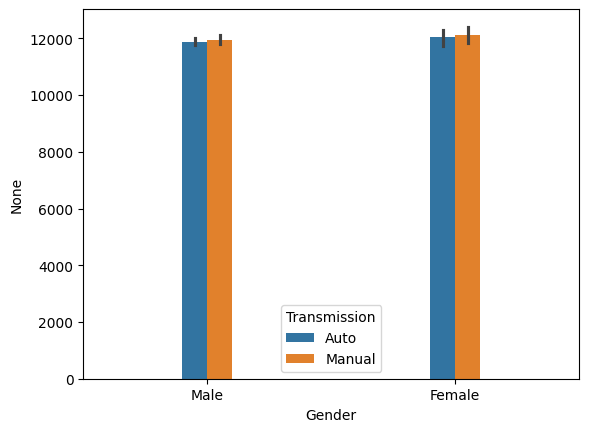

In [87]:
# Tiramos a conclusão que nesse dataset, a transmissão não é um fator determinante na hora da compra, mas o Manual segue maior para ambos.
sns.barplot(data=dados, x=dados['Gender'], y=dados.index, hue='Transmission', width=0.2)


In [49]:
dados[['Gender', 'Transmission']].value_counts()

Gender  Transmission
Male    Auto            9872
        Manual          8926
Female  Auto            2699
        Manual          2409
Name: count, dtype: int64

**20. Análise de Correlação entre Características do Carro e Preço:** Investigação de possíveis correlações entre características específicas do carro, como tamanho do motor, tipo de transmissão ou cor, e o preço de venda.

In [6]:
dados.head()

,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Body Style,Dealer_Region
0,1/2/2022,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,SUV,Middletown
1,1/2/2022,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,SUV,Aurora
2,1/2/2022,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,Passenger,Greenville
3,1/2/2022,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,SUV,Pasco
4,1/2/2022,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,Hatchback,Janesville


In [28]:
caracteristicas_preco = dados[['Price ($)', 'Color', 'Transmission', 'Body Style']]

In [29]:
caracteristicas_preco.sort_values(by='Price ($)', ascending=False)

,Price ($),Color,Engine,Transmission,Body Style
7068,85800,Black,Overhead Camshaft,Manual,Passenger
17129,85601,Black,Overhead Camshaft,Manual,Passenger
13605,85600,Black,Overhead Camshaft,Manual,Passenger
358,85600,Black,Overhead Camshaft,Manual,Hatchback
9228,85500,Black,Overhead Camshaft,Manual,SUV
...,...,...,...,...,...
13949,4200,Pale White,DoubleÂ Overhead Camshaft,Auto,Hatchback
14020,2200,Black,Overhead Camshaft,Manual,SUV
14010,1700,Black,Overhead Camshaft,Manual,Hatchback
13996,1450,Red,DoubleÂ Overhead Camshaft,Auto,SUV


In [31]:
caracteristicas_preco['Color'].value_counts()

Color
Pale White    11256
Black          7857
Red            4793
Name: count, dtype: int64

<Axes: xlabel='Body Style', ylabel='Price ($)'>

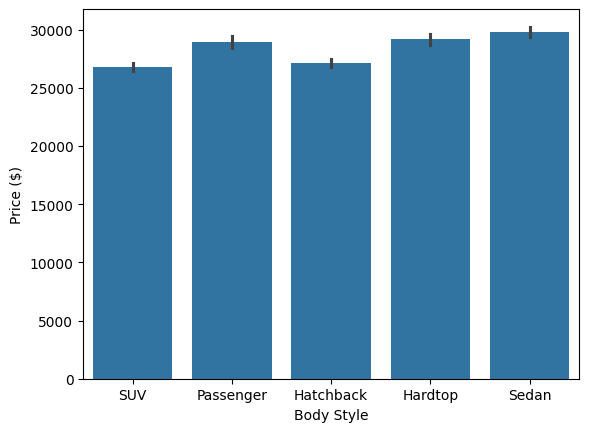

In [50]:
sns.barplot(data=caracteristicas_preco, x='Body Style', y='Price ($)')

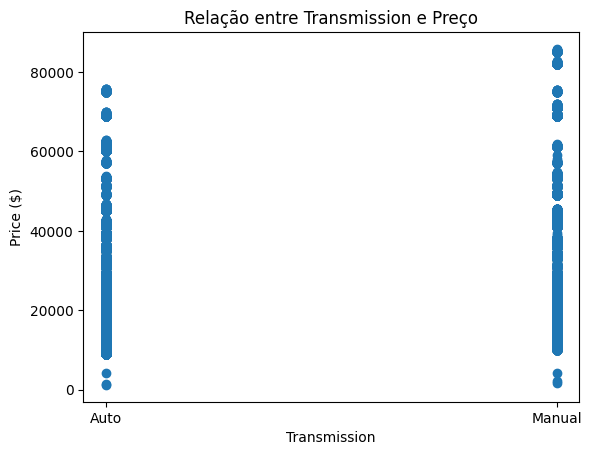

In [40]:
plt.scatter(caracteristicas_preco['Transmission'], caracteristicas_preco['Price ($)'])
plt.xlabel('Transmission')
plt.ylabel('Price ($)')
plt.title('Relação entre Transmission e Preço')
plt.show()
